
Number of words in input_1: 83



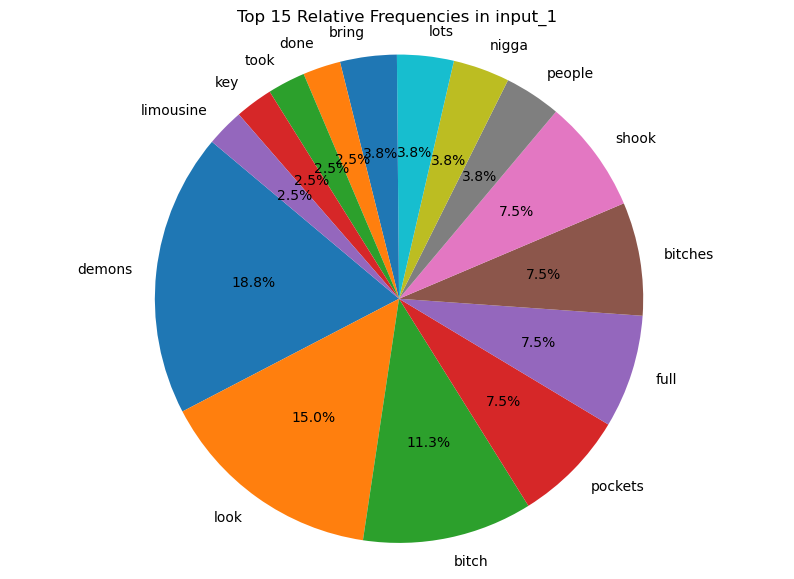


Number of words in input_2: 90



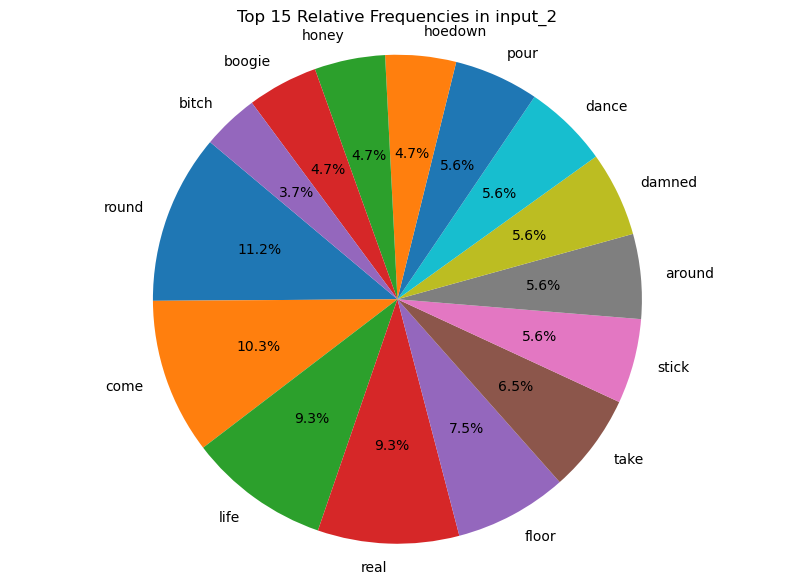


Number of words in input_3: 96



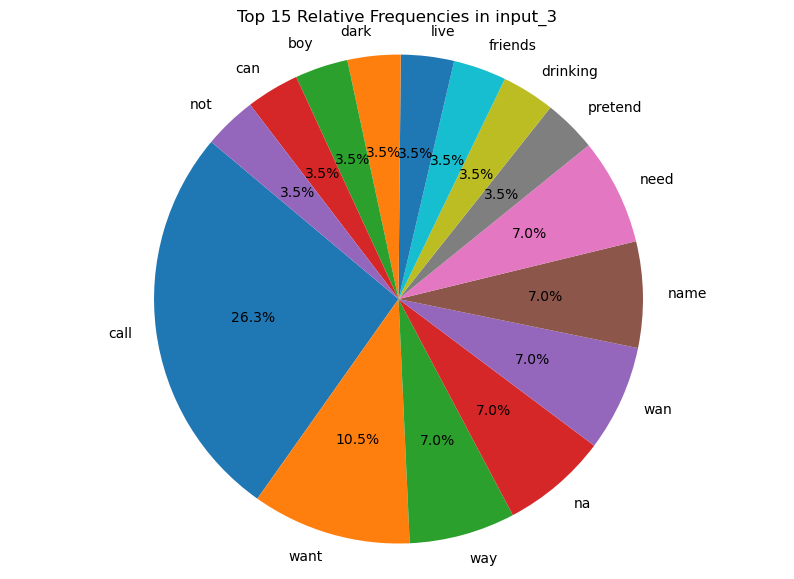


Number of words in input_4: 90



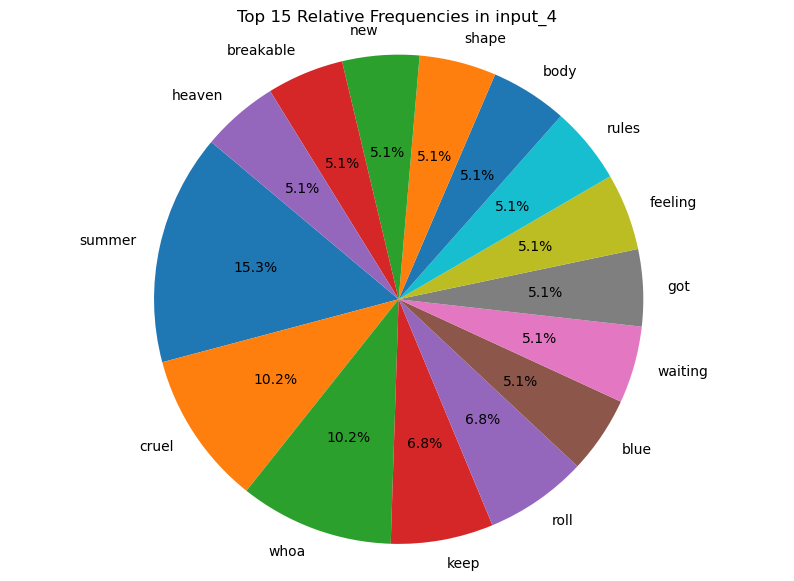

In [25]:
# Importing necessary libraries
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt

# Assuming nltk stopwords and punkt tokenizer have already been downloaded. If not, uncomment the next lines:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

# List of input files
inputs = [
    "C:\\Users\\akunna1\\Desktop\\Projects\\data-mining-lyrics\\doja-cat-demons.txt",
    "C:\\Users\\akunna1\\Desktop\\Projects\\data-mining-lyrics\\beyonce-texas-hold-em.txt",
    "C:\\Users\\akunna1\\Desktop\\Projects\\data-mining-lyrics\\lil-nas-x-call-me-by-your-name.txt",
    "C:\\Users\\akunna1\\Desktop\\Projects\\data-mining-lyrics\\taylor-swift-cruel-summer.txt"
    # add more here
]

# Loading the stop words
stop_words = set(stopwords.words('english'))

# Adding auxiliary verbs and slangs to the stopwords list
auxiliary_verbs = ['am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
                   'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could',
                   'shall', 'should', 'will', 'would', 'may', 'might', 'must', 'uh', 'ooh', 'woah', 'ayy', 'yeah', 'mmm', 'mm', 'woo', 'na', 'oh', 'em', 'hey']

stop_words.update(auxiliary_verbs)

# Punctuations and special characters to be removed
punctuations_and_more = ['○', '‘', '·', '➢', '❖', '◤', 'ˆ', '>', '<', '”', '“', '—', '®', '&', '◢', '~', '�', '%', '▪', '@', '•', '\\', '●', '|', '–', ',', '.', '"', '!', '?', ':', ';', '-', '(', ')', '[', ']', "'", '*', '$', '/', '+', '’', '_']

# Function to clean text
def clean_text(text):
    for char in punctuations_and_more:
        text = text.replace(char, ' ')  # Replacing punctuations with spaces
    text = re.sub('\s+', ' ', text)  # Removing extra spaces
    text = text.lower().strip()  # Making text lowercase
    # Removing stop words
    cleaned = ' '.join([word for word in text.split() if word not in stop_words])
    return cleaned

# Function to analyze text
def analyze_text(text):
    # Tokenizing the cleaned text
    tokens = word_tokenize(text)
    # Calculating absolute frequency
    freq_dist = FreqDist(tokens)
    # Calculating relative frequency as a percentage
    total_words = len(tokens)
    relative_freq = {word: (count / total_words) * 100 for word, count in freq_dist.items()}
    # Creating a DataFrame for displaying the results
    data = {'Word': list(freq_dist.keys()), 'Relative Frequency (%)': [relative_freq[word] for word in freq_dist.keys()]}
    df = pd.DataFrame(data)
    # Sorting the DataFrame in descending order by relative frequency
    df = df.sort_values(by='Relative Frequency (%)', ascending=False)
    return df

# Function to plot pie charts
def plot_pie_chart(df, title):
    # Selecting top 15 relative frequencies
    top_20_df = df.head(15)
    plt.figure(figsize=(10, 7))
    plt.pie(top_20_df['Relative Frequency (%)'], labels=top_20_df['Word'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 15 Relative Frequencies in {title}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Processing each input file
for i, input_file in enumerate(inputs, 1):
    # Reading the input file
    with open(input_file, 'r', encoding='utf-8') as file:
        song_text = file.read()
    # Cleaning the text
    cleaned_text = clean_text(song_text)
    # Analyzing the cleaned text
    df = analyze_text(cleaned_text)
    # Counting the number of words
    df_num = df.shape[0]
    # Displaying the number of values
    print(f"\n\033[4mNumber of words in input_{i}:\033[0m {df_num}\n")
    # Plotting the pie chart
    plot_pie_chart(df, f'input_{i}')
